# Heart Attack Analysis and Prediction
this notebook analyzes the heart attack dataset and builds predictive models to predict the probability of heart attack.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [3]:
heart = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
satura = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv")
# heart = pd.read_csv("./input/heart.csv")
# satura = pd.read_csv("./input/o2Saturation.csv")

In [4]:
heart.shape, satura.shape

((303, 14), (3585, 1))

In [5]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
category_features=['sex', 'cp', 'fbs', 'restecg', 'slp', 'caa', 'thall', 'exng']
numeric_features=['age','trtbps','chol','thalachh','oldpeak']

c_feature =[]
n_feature = []
for feature in category_features:
    # print(feature,':',heart[feature].unique())
    if feature in heart.columns:
        c_feature.append(feature)

for feature in numeric_features:
    # print(feature,':',heart[feature].unique())
    if feature in heart.columns:
        n_feature.append(feature)

numeric_data = heart[n_feature]
category_data = heart[c_feature]

In [10]:
satura.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


# 1. Exploratory Data Analysis

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

output
1    165
0    138
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of target values')

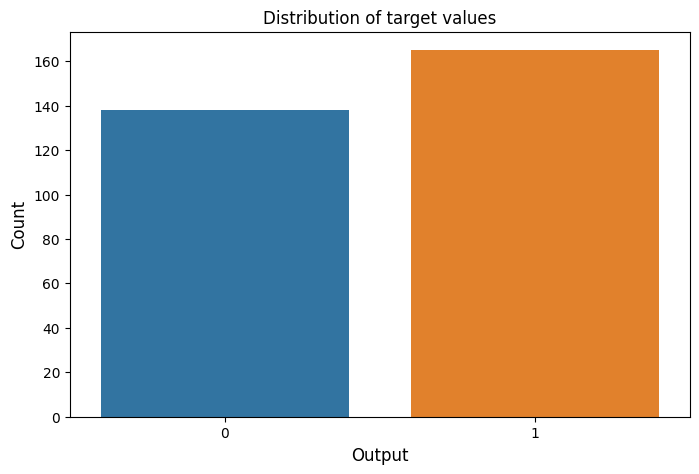

In [12]:
print(heart['output'].value_counts())
plt.figure(figsize = (8, 5))
sns.countplot(x = heart['output'])
plt.xlabel("Output", size = 12)
plt.ylabel("Count", size = 12)
plt.title("Distribution of target values", size = 12)

In [13]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

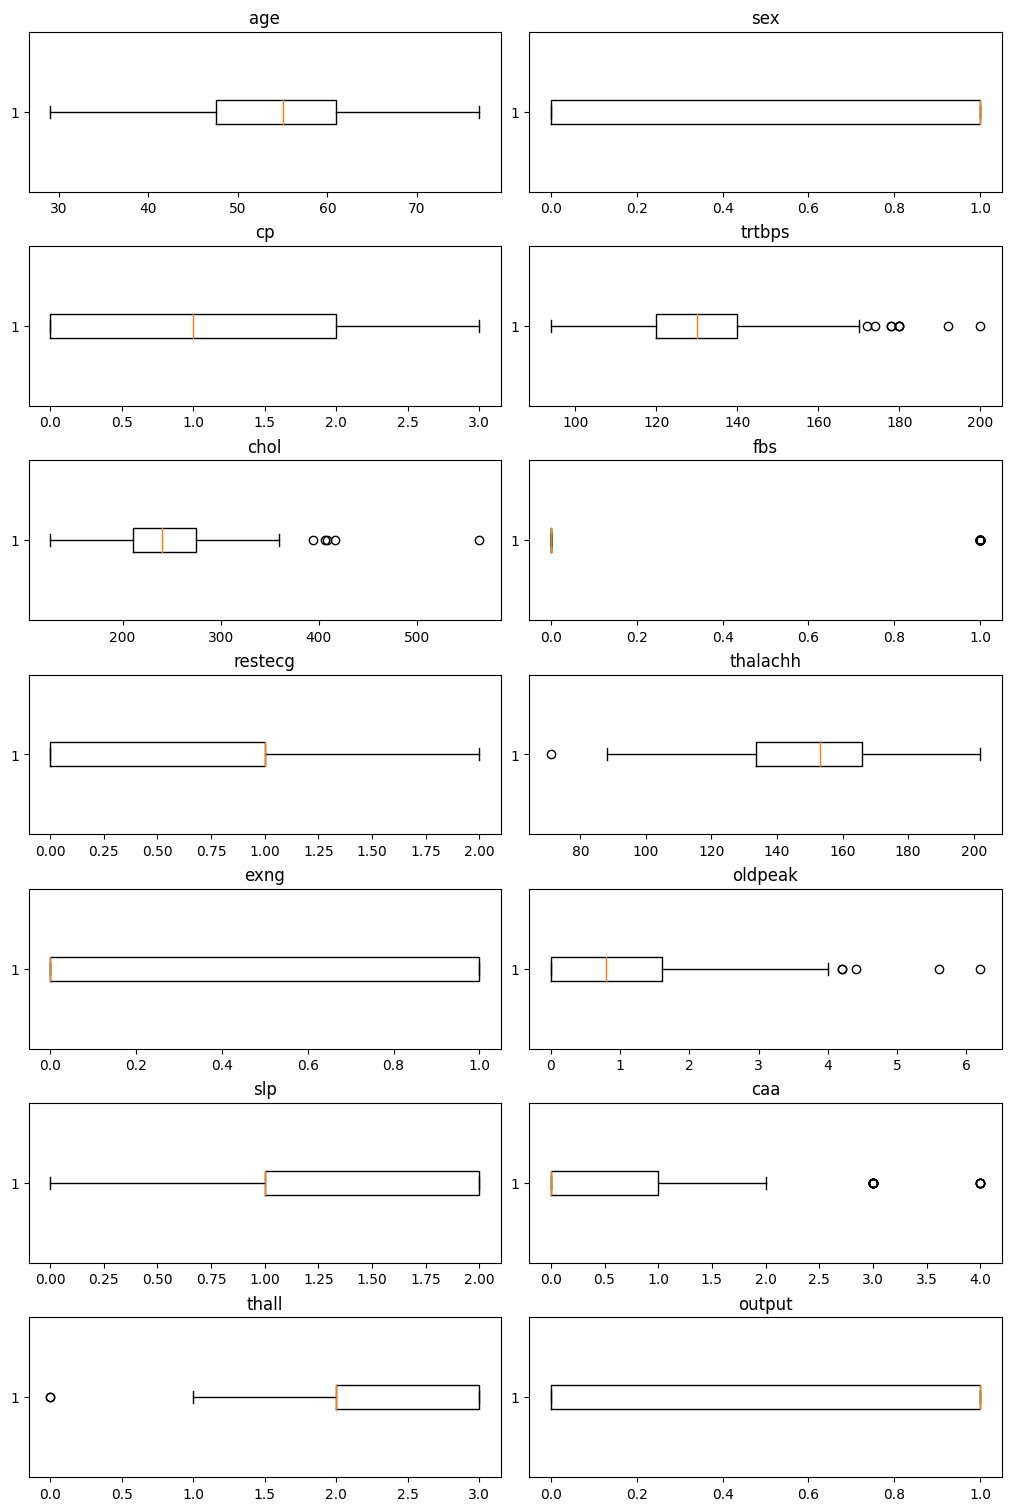

In [14]:
col = heart.columns
fgi, ax = plt.subplots(7,2 , figsize = (10,15), constrained_layout=True)
ax = ax.flatten()
for ind, axi in enumerate(ax.flat):
    axi.boxplot(heart[col[ind]], vert = False)
    axi.set_title(col[ind], size = 12)

<Axes: >

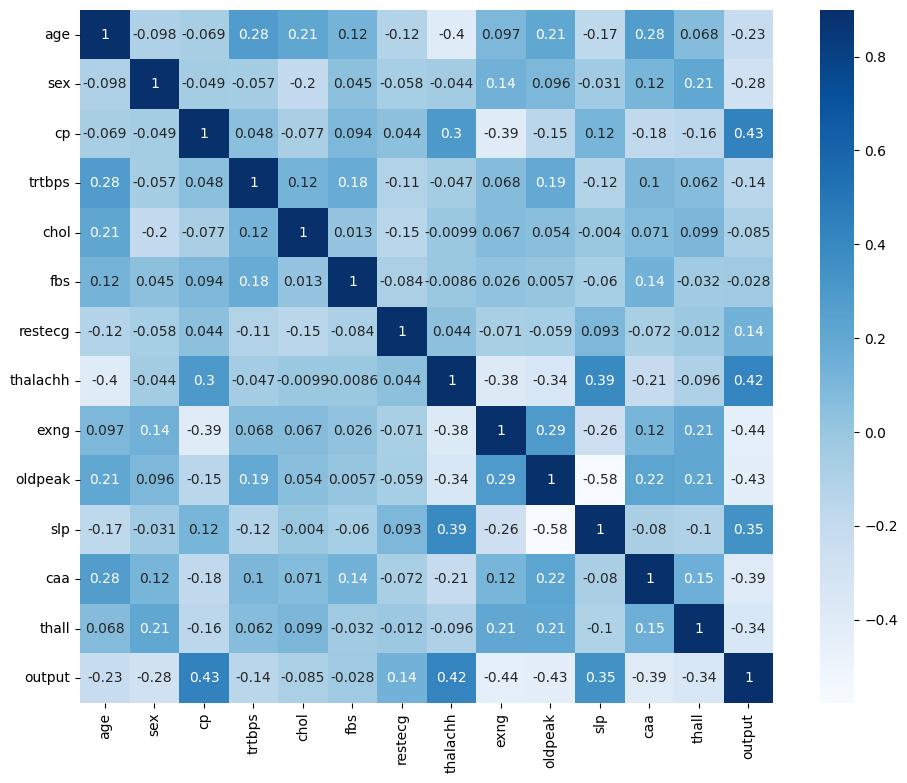

In [15]:
corr = heart.corr()
plt.figure(figsize =  (12,9))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True, annot = True)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

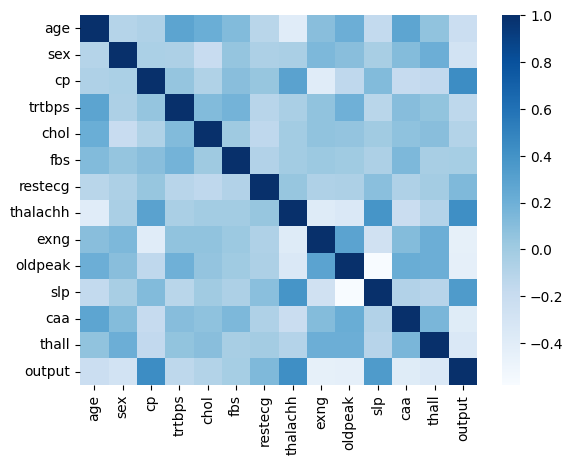

In [16]:
display(heart.corr())
sns.heatmap(heart.corr(), cmap="Blues")

In [17]:
rel = corr['output'].sort_values(ascending = False)
rel

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64

In [18]:
# higher correlation between output and features(cp, thalachh, clp, restecg)
positive_list = []
for i in range (len(rel)):
    if rel.iloc[i] > 0:
        positive_list.append(rel.index[i])
positive_list

['output', 'cp', 'thalachh', 'slp', 'restecg']

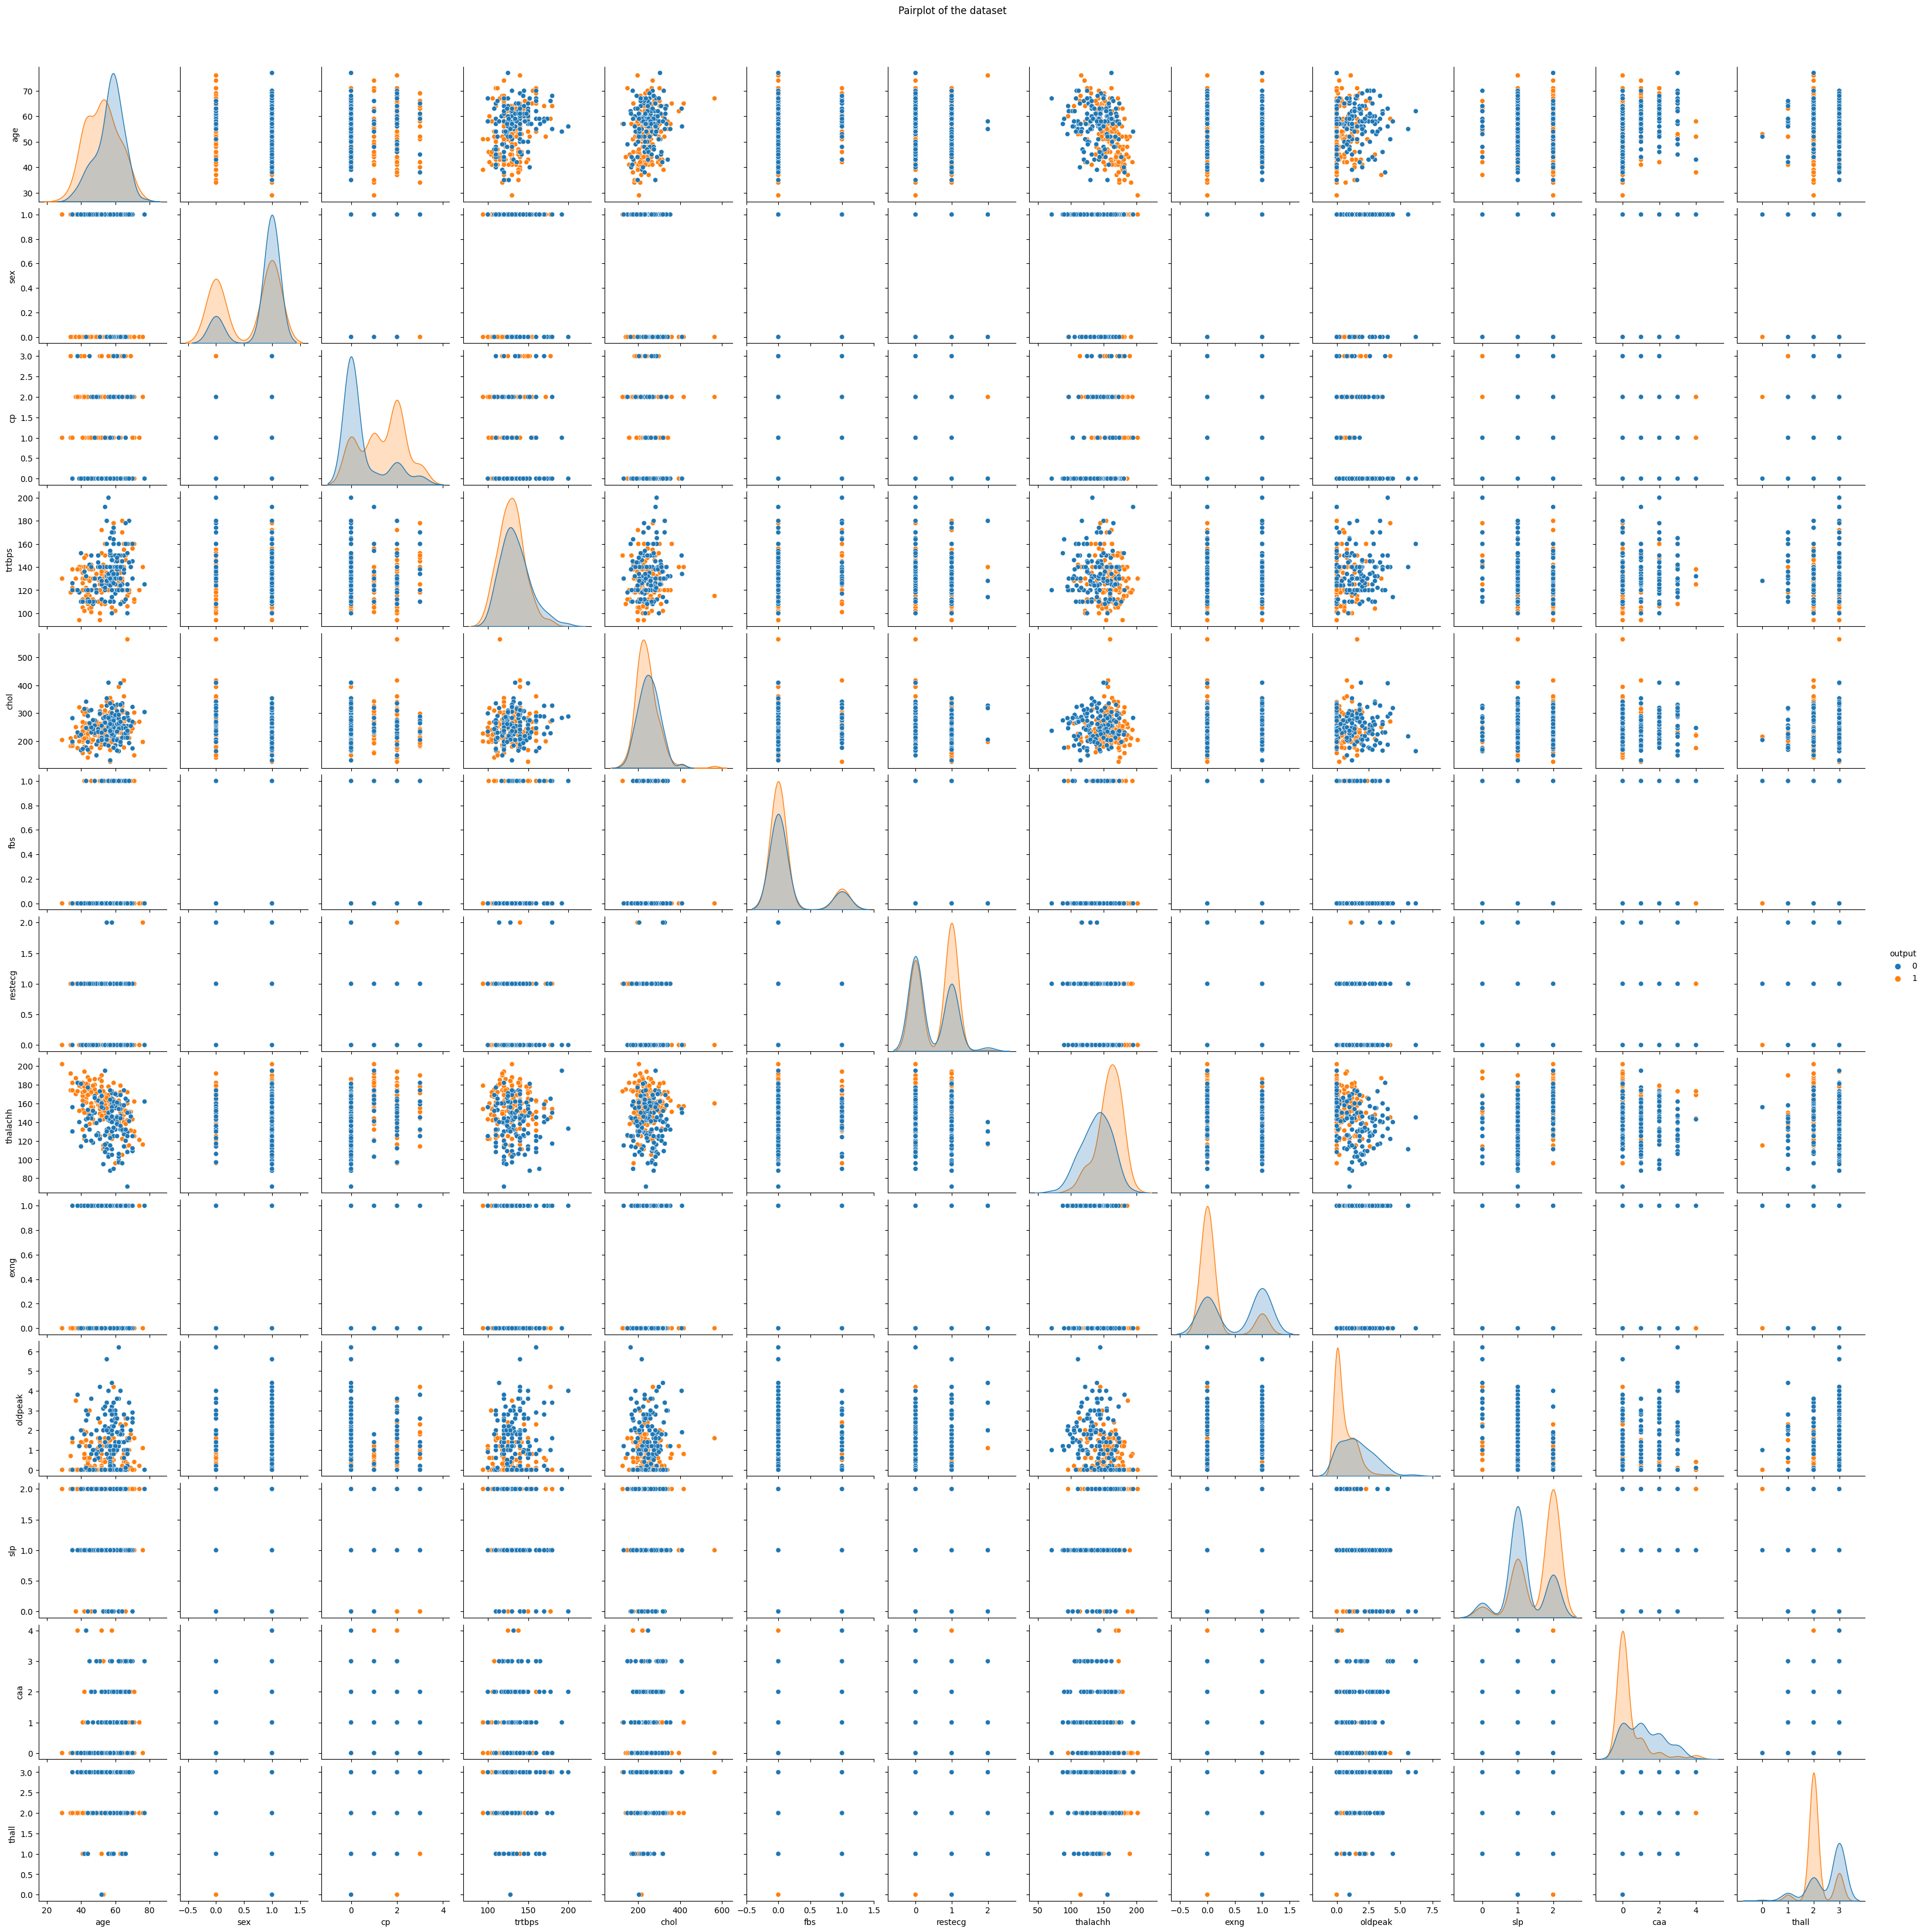

In [19]:
# sns.pairplot(heart, hue = 'output') 
# with title
sns.pairplot(heart, hue = 'output').fig.suptitle('Pairplot of the dataset', y=1.02)
plt.show()

 - Object with cp = 2 have higher chance of heart attack, with cp = 0 have lower chances of heart attack
 - Object with rest_ecg = 1 have higher chance of heart attack (having ST-T wave abnormality)
 - Object with higher thalachh have higher change of heart attack(higher Maximum heart rate achieve)
 - Object with exng = 0 have higher chance of heart attack
 - Object with lower oldpeak have higher chances of heart attack
 - Object with slp = 2 have higher chance of heart attack; with slp = 1 have lower chance of heart attack
 - Object with caa = 0 have higher chance of heart attack
 - Object with thall = 2 have much higher chance of heart attack

## 1.1 Category features 

In [20]:
category_features

['sex', 'cp', 'fbs', 'restecg', 'slp', 'caa', 'thall', 'exng']

sex
1    207
0     96
Name: count, dtype: int64


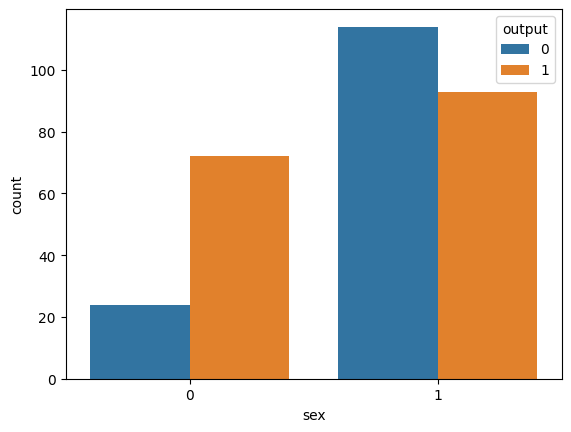

In [21]:
# sex
x = heart.sex.value_counts()
print(x)
p = sns.countplot(data = heart, x="sex", hue = "output")
# Objects having sex 1 are more than twice the objects having sex 0

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64


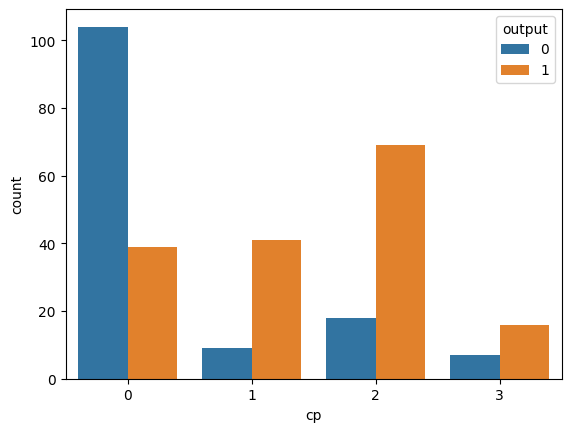

In [22]:
# cp
x = heart.cp.value_counts()
print(x)
p = sns.countplot(data = heart, x="cp", hue = "output")
# Objects of cp 0 have the largest count, cp 3 have the lowest count

fbs
0    258
1     45
Name: count, dtype: int64


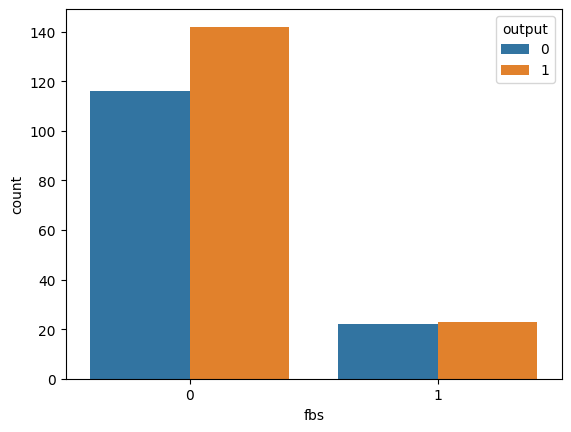

In [23]:
# fbs
x = heart.fbs.value_counts()
print(x)
p = sns.countplot(data = heart, x="fbs", hue = "output")
# Objects having fbs 0 are more than four times the objects having fbs 1

restecg
1    152
0    147
2      4
Name: count, dtype: int64


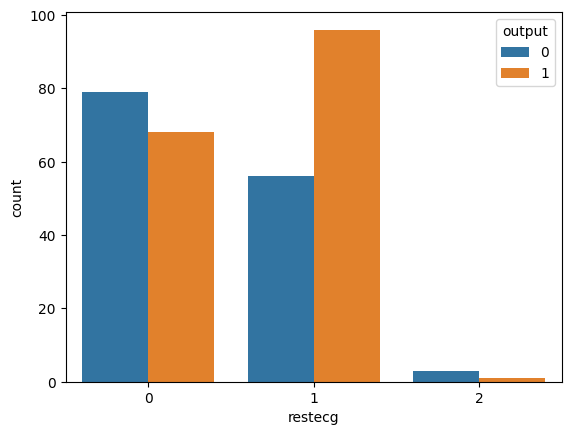

In [24]:
# restecg
x = heart.restecg.value_counts()
print(x)
p = sns.countplot(data = heart, x="restecg", hue = "output")
# restecg-0 & restecg-1 have similar counts, restecg-2 have the lowest count restecg-2 is almost negligible

slp
2    142
1    140
0     21
Name: count, dtype: int64


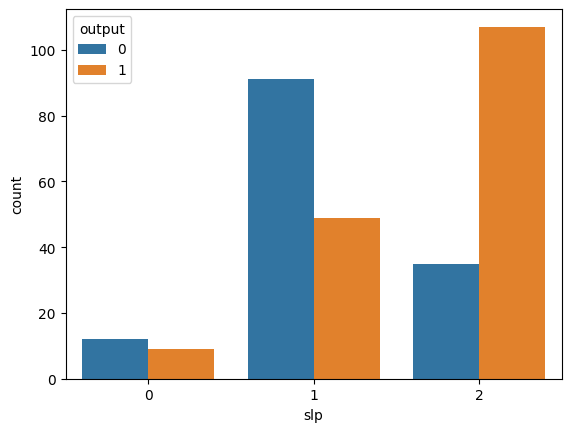

In [25]:
# slp
x = heart.slp.value_counts()
print(x)
p = sns.countplot(data = heart, x="slp", hue = "output")
# slp-1 & slp-2 have similar counts, slp-0 have the lowest count

caa
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64


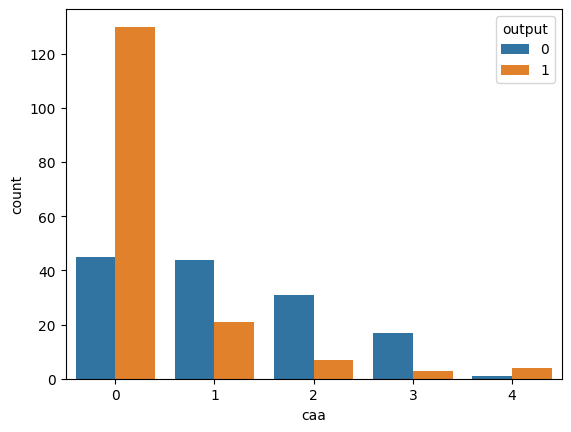

In [26]:
# caa
x = heart.caa.value_counts()
print(x)
p = sns.countplot(data = heart, x="caa", hue = "output")
# caa-0 have the largest count, caa-4 have the lowest count

thall
2    166
3    117
1     18
0      2
Name: count, dtype: int64


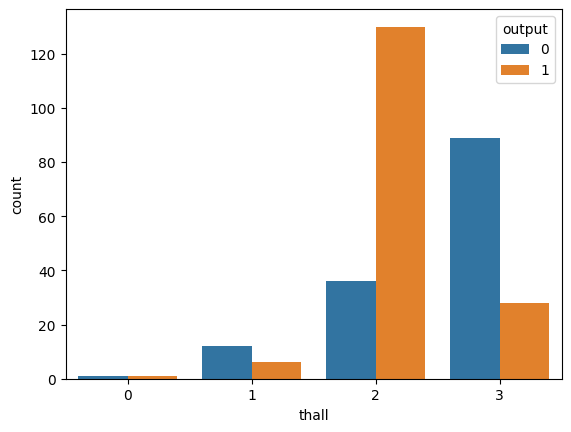

In [27]:
# thall
x = heart.thall.value_counts()
print(x)
p = sns.countplot(data = heart, x="thall", hue = "output")
# thall-2 have the largest count, thall-0 have the lowest count

exng
0    204
1     99
Name: count, dtype: int64


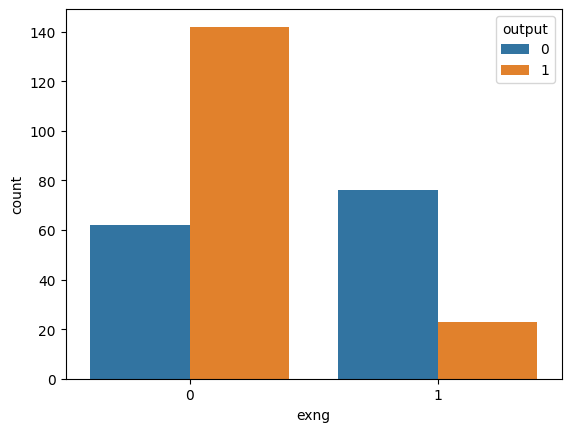

In [28]:
# exng
x = heart.exng.value_counts()
print(x)
p = sns.countplot(data = heart, x="exng", hue = "output")
# exng-0 have more counts than exng-1

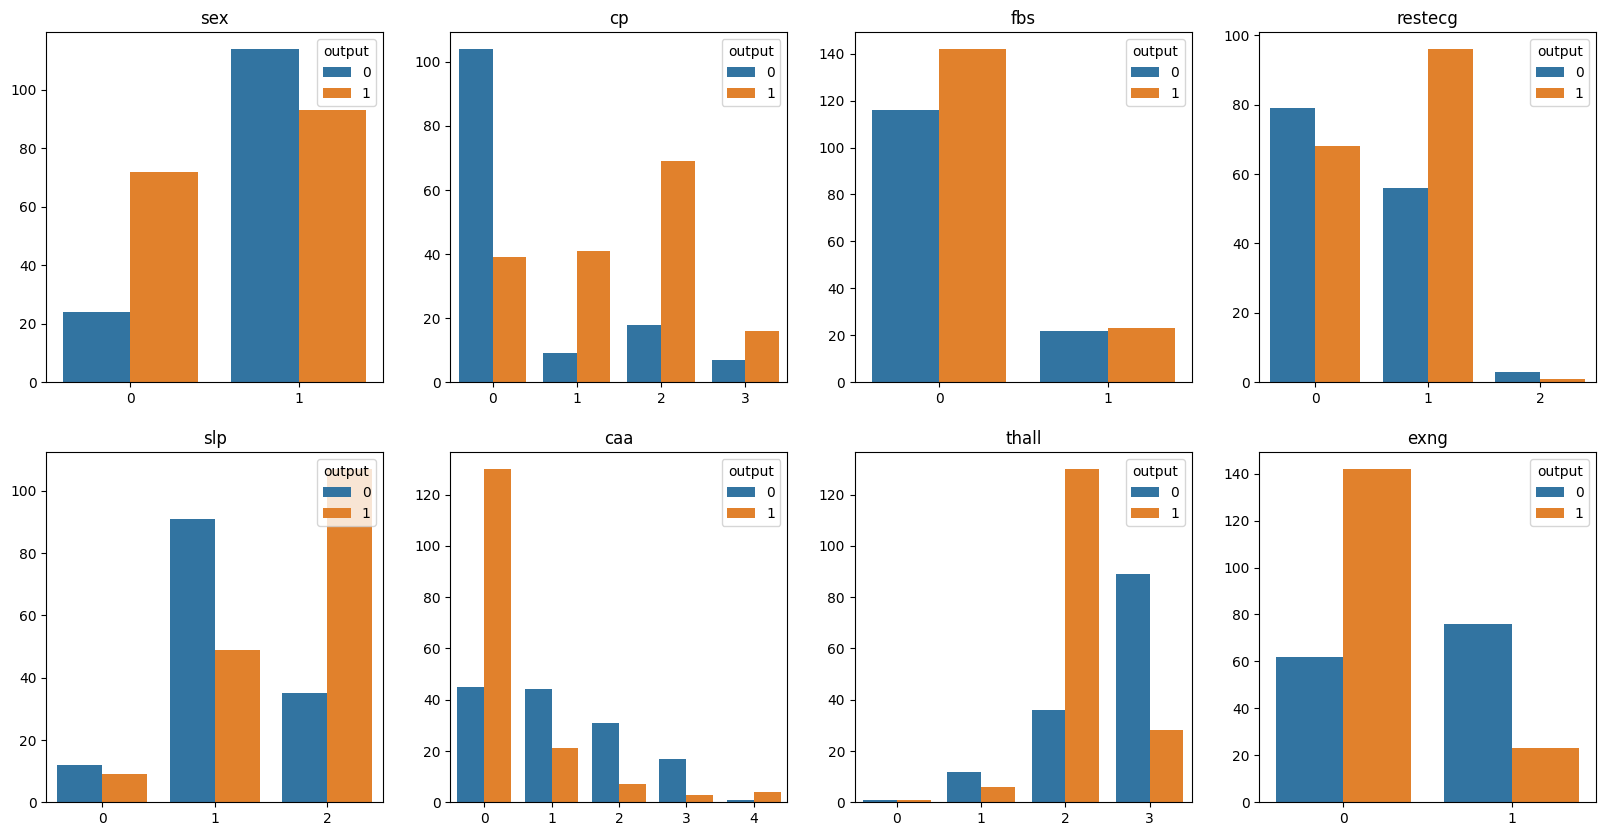

In [29]:
# draw above plots in a single plot
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(heart[category_features]):
    sns.countplot(x=c, data=heart, hue='output', ax=axes[i])
    axes[i].legend(title='output', loc='upper right')
    axes[i].set_title(c)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
plt.show()

## 1.2 Numeric features

In [30]:
numeric_features

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

<Axes: xlabel='age', ylabel='Count'>

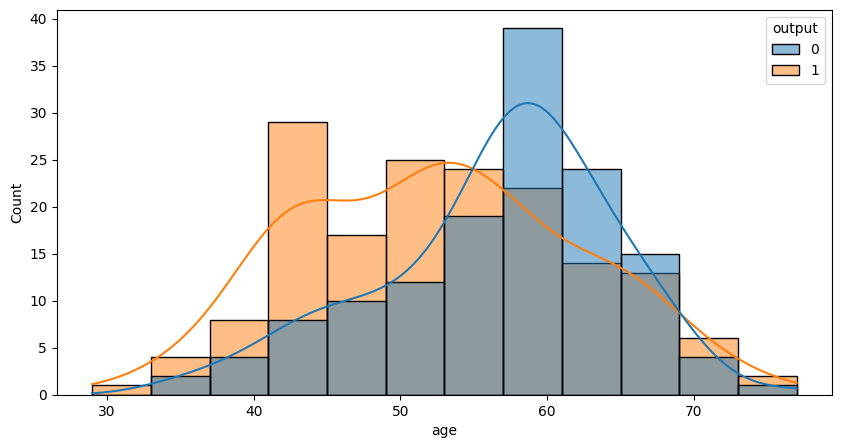

In [31]:
# age
plt.figure(figsize = (10, 5))
sns.histplot(data = heart, x = "age", hue = "output", kde = True)
# age group 40-60 have more heart attacks

<Axes: xlabel='trtbps', ylabel='Count'>

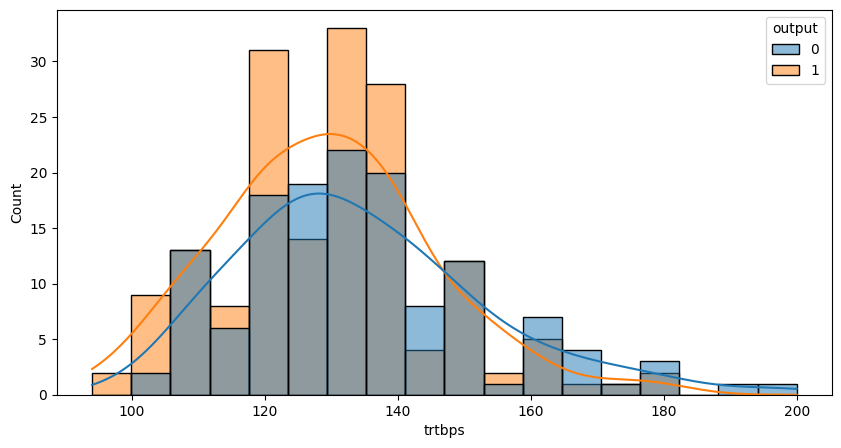

In [32]:
# trtbps
plt.figure(figsize = (10, 5))
sns.histplot(data = heart, x = "trtbps", hue = "output", kde = True)
# trtbps group 120-140 have more heart attacks

<Axes: xlabel='chol', ylabel='Count'>

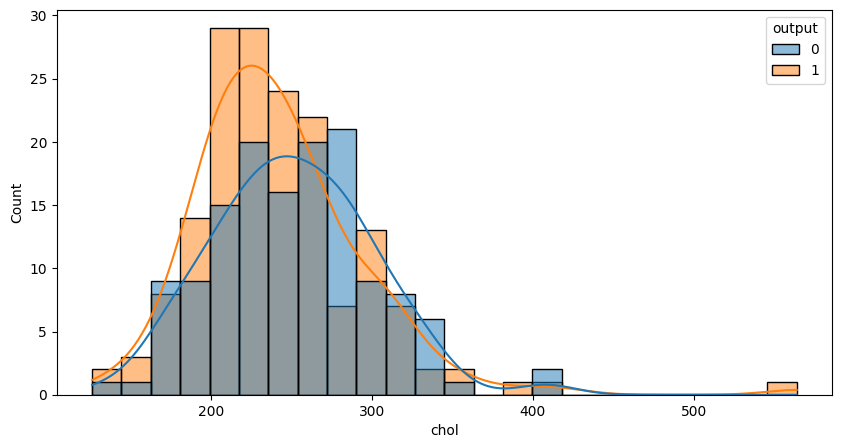

In [33]:
# chol
plt.figure(figsize = (10, 5))
sns.histplot(data = heart, x = "chol", hue = "output", kde = True)
# chol group 200-300 have more heart attacks

<Axes: xlabel='thalachh', ylabel='Count'>

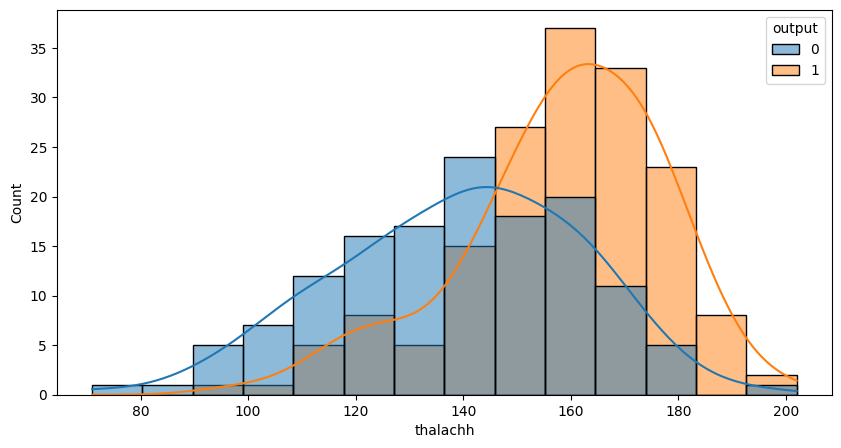

In [34]:
# thalachh
plt.figure(figsize = (10, 5))
sns.histplot(data = heart, x = "thalachh", hue = "output", kde = True)
# thalachh group 150-200 have more heart attacks

<Axes: xlabel='oldpeak', ylabel='Count'>

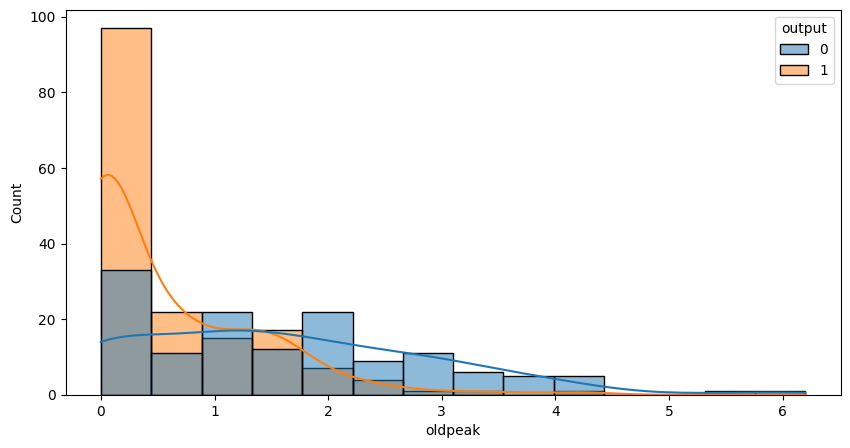

In [35]:
# oldpeak
plt.figure(figsize = (10, 5))
sns.histplot(data = heart, x = "oldpeak", hue = "output", kde = True)
# oldpeak group 0-2 have more heart attacks

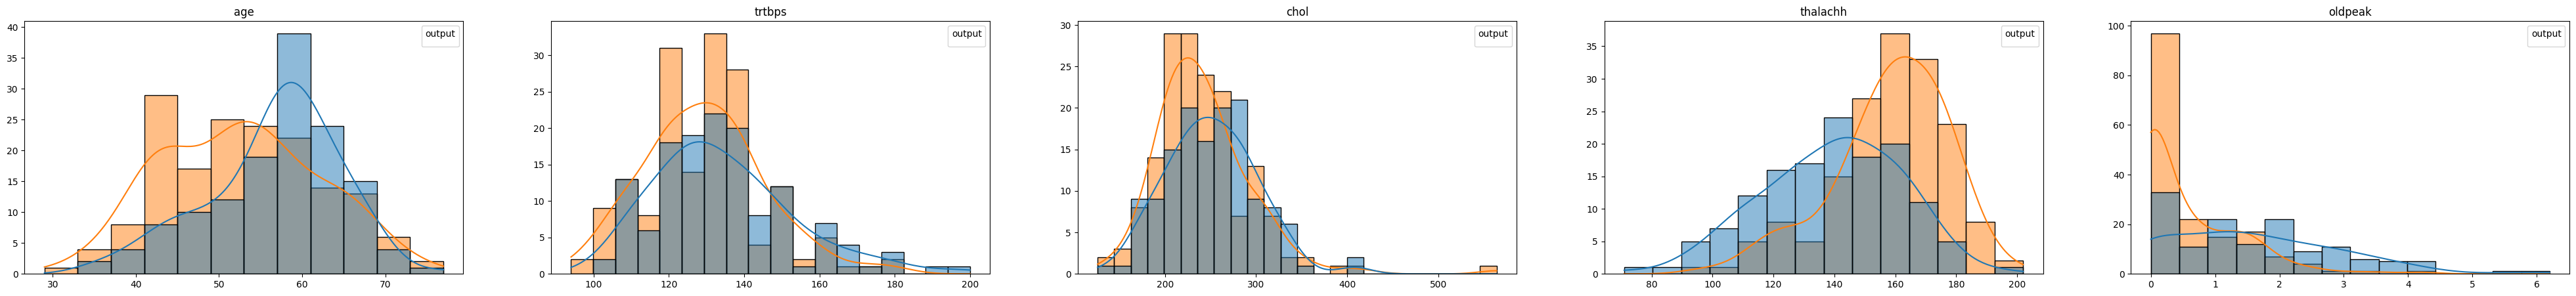

In [36]:
# draw above plots in a single plot
fig, axes = plt.subplots(1, 5, figsize=(50, 5))

for i, c in enumerate(heart[numeric_features]):
    sns.histplot(x=c, data=heart, hue='output', kde=True, ax=axes[i])
    axes[i].legend(title='output', loc='upper right')
    axes[i].set_title(c)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.show()

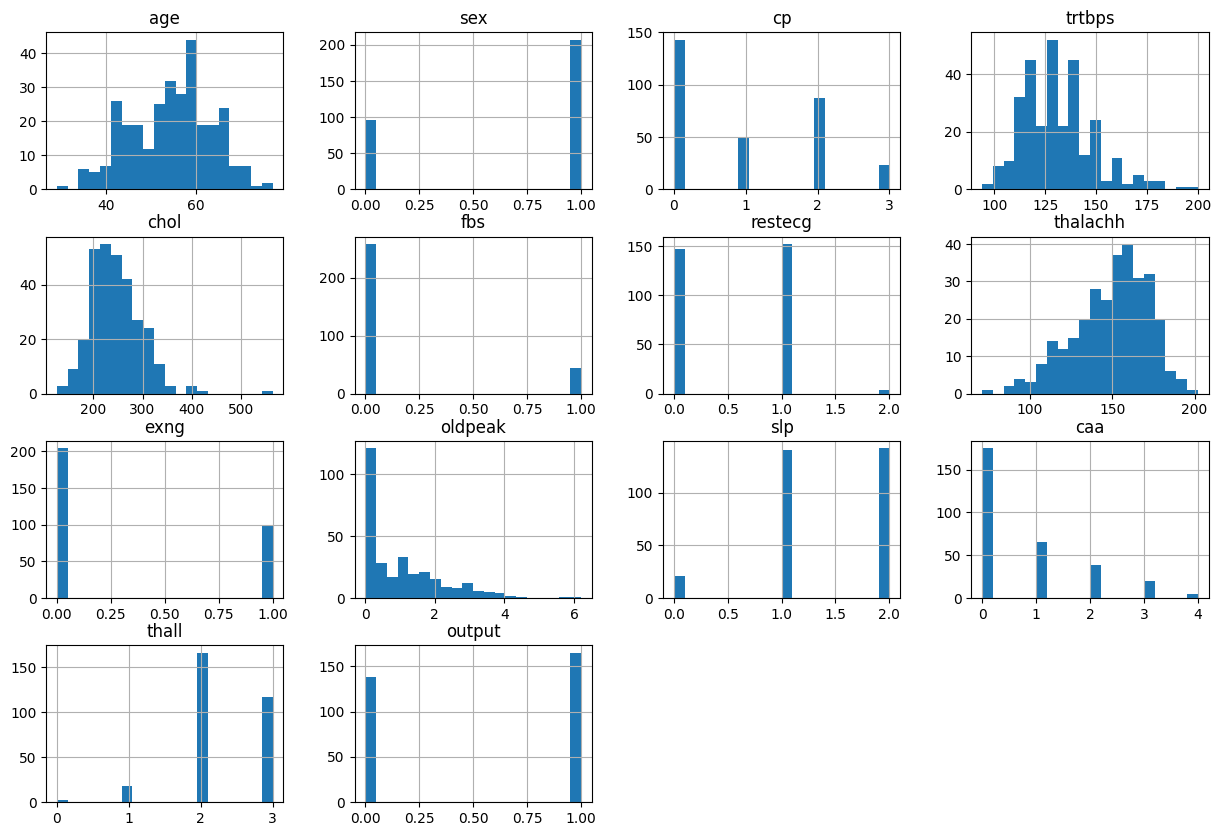

In [37]:
import matplotlib.pyplot as plt
heart.hist(bins=20, figsize=(15, 10))
plt.show()

### PCA (Principal Component Analysis)

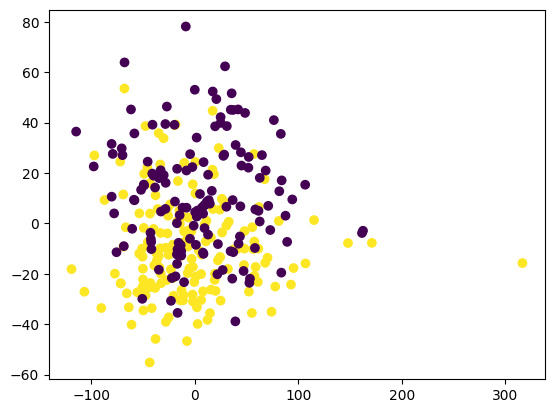

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components = pca.fit_transform(heart.drop(columns=['output']))
plt.scatter(components[:, 0], components[:, 1], c=heart['output'])

# 2. Data preprocessing

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Check null data
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## 2.1 Remove duplicate records

In [40]:
# Check repeated data
print('Number of repeated data:',heart.duplicated().sum())
heart[heart.duplicated()]

Number of repeated data: 1


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [41]:
heart.drop_duplicates(keep='first', inplace=True)
heart = heart.reset_index(drop=True)
print('After clean: Number of records:',heart.shape[0], '\nNumber of attributes:',heart.shape[1])

After clean: Number of records: 302 
Number of attributes: 14


## 2.2 remove outlier

In [42]:
numeric_data=heart[numeric_features]
category_data=heart[category_features]

In [43]:
numeric_data.head()

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [44]:
category_data.head()

,sex,cp,fbs,restecg,slp,caa,thall,exng
0,1,3,1,0,0,0,1,0
1,1,2,0,1,0,0,2,0
2,0,1,0,0,2,0,2,0
3,1,1,0,1,2,0,2,0
4,0,0,0,1,2,0,2,1


In [45]:
#replace outliar with mean value  and  IQR
Q3 = numeric_data.quantile(0.75) 
Q1 = numeric_data.quantile(0.25) 
IQR = Q3 - Q1
# outliar range
upper = dict(Q3 + 1.5 * IQR)
lower = dict(Q1 - 1.5 * IQR)
for feature,values in numeric_data.items():
    for idx in range(len(values)):
        if values[idx] >upper[feature] or values[idx] < lower[feature]:
            numeric_data[feature][idx] = np.mean(numeric_data[feature])

## 2.3 One-hot encoding for category features

In [46]:
heart[c_feature] = heart[c_feature].astype('category')
heart = pd.get_dummies(heart, columns=c_feature, drop_first=True)

print('After one hot encoding: Number of records:',heart.shape[0], '\nNumber of attributes:',heart.shape[1])

x = heart.iloc[:,:-1]
# x.drop('output', axis = 1, inplace = True)

y = heart.loc[:,'output']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print('Train set:', x_train.shape, y_train.shape)
print('Test set:', x_test.shape, y_test.shape)

After one hot encoding: Number of records: 302 
Number of attributes: 23
Train set: (241, 22) (241,)
Test set: (61, 22) (61,)


In [47]:
x.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,restecg_2,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,1,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,1,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,120,236,178,0.8,1,True,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,120,354,163,0.6,1,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


## 2.4 Normalize numerical features

In [48]:
col = x.columns
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)
print('Train set:', x_train.shape, y_train.shape)
print('Test set:', x_test.shape, y_test.shape)
# x = pd.DataFrame(data = x, columns = col)
heart.head()

Train set: (241, 22) (241,)
Test set: (61, 22) (61,)


,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3,exng_1
0,63,145,233,150,2.3,1,True,False,False,True,...,False,False,False,False,False,False,True,False,False,False
1,37,130,250,187,3.5,1,True,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,41,130,204,172,1.4,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
3,56,120,236,178,0.8,1,True,True,False,False,...,False,True,False,False,False,False,False,True,False,False
4,57,120,354,163,0.6,1,False,False,False,False,...,False,True,False,False,False,False,False,True,False,True


# 3. Modeling methods comparison

## 3.1 Classification Methods

### 3.1.1 basic classification model

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

modelList = []
modelNameList = []
scores =[] 
# Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)
modelList.append(lr)
modelNameList.append("Logistic Regression")
predictedLR = lr.predict(x_test)
scores.append(accuracy_score(y_test, predictedLR)*100)
print("Logistic Regression Accuracy: ", accuracy_score(y_test, predictedLR)*100, "%")


# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
modelList.append(dt)
modelNameList.append("Decision Tree")
predictedDT = dt.predict(x_test)
scores.append(accuracy_score(y_test, predictedDT)*100)
print("Decision Tree Accuracy: ", accuracy_score(y_test, predictedDT)*100, "%")

# Random Forest
rf = RandomForestClassifier(n_estimators=1, random_state=42)
rf.fit(x_train, y_train)
modelList.append(rf)
modelNameList.append("Random Forest")
predictedRF = rf.predict(x_test)
scores.append(accuracy_score(y_test, predictedRF)*100)
print("Random Forest Accuracy: ", accuracy_score(y_test, predictedRF)*100, "%")

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
modelList.append(gb)
modelNameList.append("Gradient Boosting")
predictedGB = gb.predict(x_test)
scores.append(accuracy_score(y_test, predictedGB)*100)
print("Gradient Boosting Accuracy: ", accuracy_score(y_test, predictedGB)*100, "%")

# XGBoost
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
modelList.append(xgb)
modelNameList.append("XGBoost")
predictedXGB = xgb.predict(x_test)
scores.append(accuracy_score(y_test, predictedXGB)*100)
print("XGBoost Accuracy: ", accuracy_score(y_test, predictedXGB)*100, "%")

# Support Vector Machine
svm = SVC()
svm.fit(x_train, y_train)
modelList.append(svm)
modelNameList.append("Support Vector Machine")
predictedSVM = svm.predict(x_test)
scores.append(accuracy_score(y_test, predictedSVM)*100)
print("Support Vector Machine Accuracy: ", accuracy_score(y_test, predictedSVM)*100, "%")

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)
modelList.append(knn)
modelNameList.append("K-Nearest Neighbors")
predictedKNN = knn.predict(x_test)
scores.append(accuracy_score(y_test, predictedKNN)*100)
print("K-Nearest Neighbors Accuracy: ", accuracy_score(y_test, predictedKNN)*100, "%")

# Naive Bayes
nb = GaussianNB()
nb.fit(x_train, y_train)
modelList.append(nb)
modelNameList.append("Naive Bayes")
predictedNB = nb.predict(x_test)
scores.append(accuracy_score(y_test, predictedNB)*100)
print("Gaussian Naive Bayes Accuracy: ", accuracy_score(y_test, predictedNB)*100, "%")

# Neural Network
nn = MLPClassifier()
nn.fit(x_train, y_train)
modelList.append(nn)
modelNameList.append("Neural Network - MLP")
predictedNN = nn.predict(x_test)
scores.append(accuracy_score(y_test, predictedNN)*100)
print("Neural Network Accuracy: ", accuracy_score(y_test, predictedNN)*100, "%")


Logistic Regression Accuracy:  100.0 %
Decision Tree Accuracy:  100.0 %
Random Forest Accuracy:  100.0 %
Gradient Boosting Accuracy:  100.0 %
XGBoost Accuracy:  100.0 %
Support Vector Machine Accuracy:  100.0 %
K-Nearest Neighbors Accuracy:  93.44262295081968 %
Gaussian Naive Bayes Accuracy:  100.0 %
Neural Network Accuracy:  98.36065573770492 %


### 3.1.2 K-fold cross validation score 
reference: https://www.kaggle.com/code/licgsg/heart-attack-analysis-python

,Model,CV Mean
0,Logistic Regression,1.000000
1,Decision Tree,1.000000
2,Random Forest,1.000000
3,Gradient Boosting,1.000000
4,XGBoost,1.000000
5,Support Vector Machine,0.652258
6,K-Nearest Neighbors,0.655591
7,Naive Bayes,1.000000
8,Neural Network - MLP,0.930323


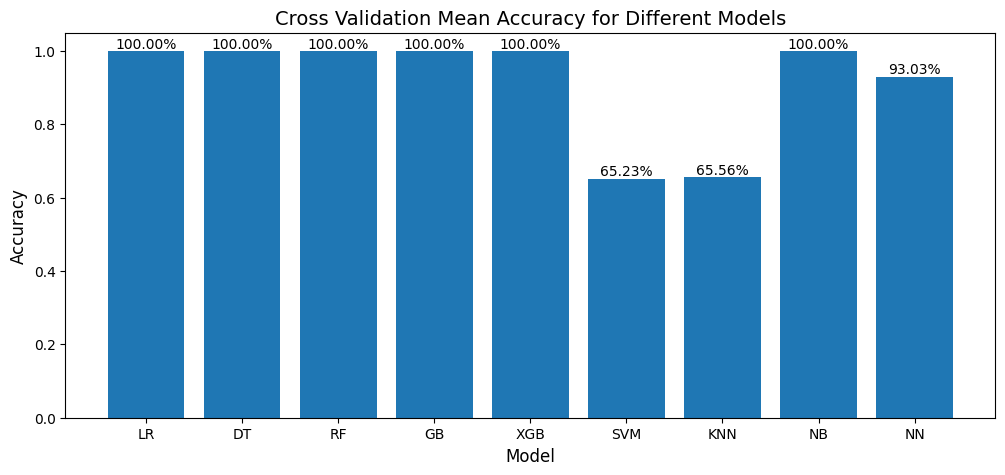

In [50]:
# k-fold cross validation
from sklearn.model_selection import cross_val_score

# Initialize required variables
k = 10
cv_scores = []
cv_mean = []

# Iterate over all models
for model in modelList:
    scores = cross_val_score(model, x, y, cv=k, scoring='accuracy')
    cv_scores.append(scores)
    cv_mean.append(scores.mean())

# Create a DataFrame to display the cross validation results
cv_results = pd.DataFrame({'Model': modelNameList, 'CV Mean': cv_mean})
display(cv_results)

modelnames = ['LR', "DT", "RF", "GB", "XGB", "SVM", "KNN", "NB", "NN"]
# draw the cross validation results,  bar colors  are different for each model
plt.figure(figsize=(12, 5))
plt.bar(modelnames, cv_mean)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
# annotate the bar graph with percentages
for i, mean in enumerate(cv_mean):
    plt.text(i, mean, f"{mean*100:.2f}%", ha='center', va='bottom')

plt.title('Cross Validation Mean Accuracy for Different Models', fontsize=14)
plt.show()

In [53]:
# 10 fold CV
from sklearn.model_selection import cross_val_score
# model_list=[lr,dt,rf, gb, xgb, svm, knn, nb, nn]
def get_cv_score(method):
    cv_score_avg=[]
    for model in modelList:
        cv_result = cross_val_score(model,heart.iloc[:,:-1], heart.loc[:,'output'],cv=10,scoring=method)
        cv_score_avg.append(np.sum(cv_result)/10)
    cv_score_avg=pd.DataFrame(data=cv_score_avg,
             index=modelNameList,
             columns=[method])
    display(cv_score_avg)
    return cv_score_avg

,accuracy
Logistic Regression,1.000000
Decision Tree,1.000000
Random Forest,1.000000
Gradient Boosting,1.000000
XGBoost,1.000000
Support Vector Machine,0.652258
K-Nearest Neighbors,0.655591
Naive Bayes,1.000000
Neural Network - MLP,0.933763


,precision
Logistic Regression,1.000000
Decision Tree,1.000000
Random Forest,1.000000
Gradient Boosting,1.000000
XGBoost,1.000000
Support Vector Machine,0.637949
K-Nearest Neighbors,0.700550
Naive Bayes,1.000000
Neural Network - MLP,0.907867


,f1
Logistic Regression,1.000000
Decision Tree,1.000000
Random Forest,1.000000
Gradient Boosting,1.000000
XGBoost,1.000000
Support Vector Machine,0.720342
K-Nearest Neighbors,0.668704
Naive Bayes,1.000000
Neural Network - MLP,0.927451


Text(0, 0.5, 'cv_score')

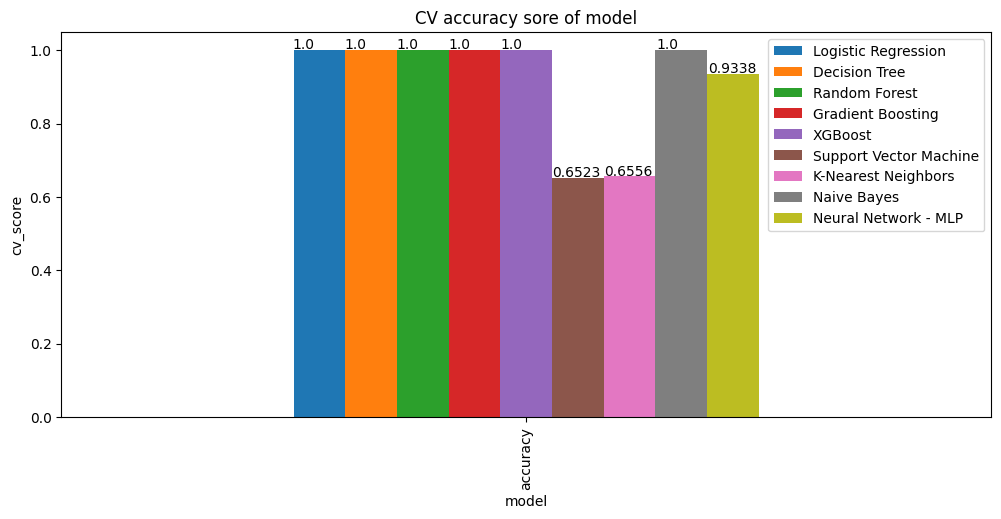

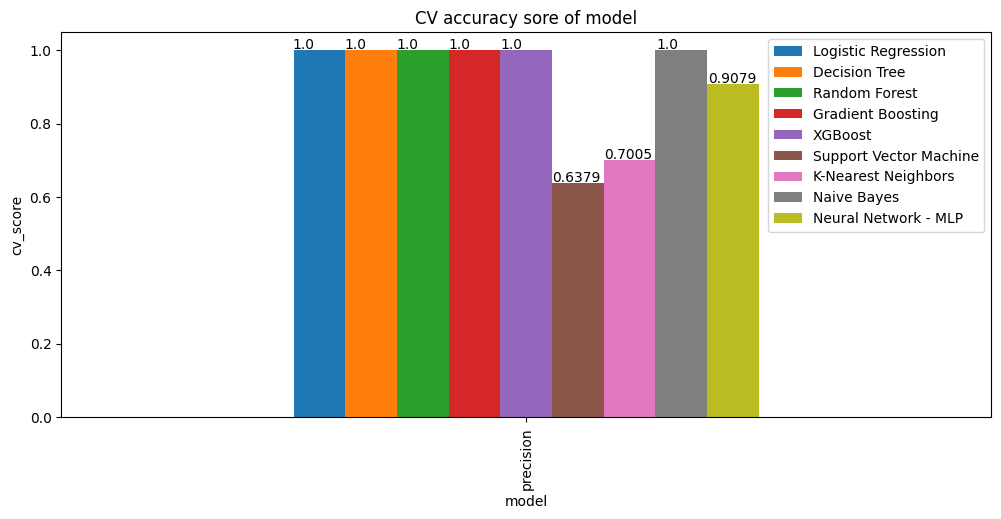

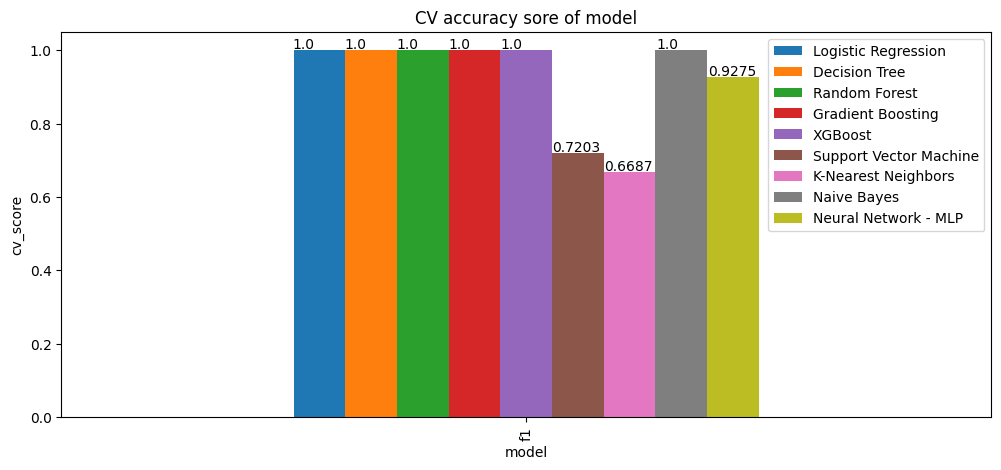

In [54]:
ax=get_cv_score("accuracy").transpose().plot(label='10-fold CV_score',kind='bar',figsize=[12,5],title='CV accuracy sore of model')
for p in ax.patches:
    ax.annotate(str(p.get_height().round(4)), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("model")
ax.set_ylabel("cv_score")

ax2=get_cv_score("precision").transpose().plot(label='10-fold CV_score',kind='bar',figsize=[12,5],title='CV accuracy sore of model')
for p in ax2.patches:
    ax2.annotate(str(p.get_height().round(4)), (p.get_x() * 1.005, p.get_height() * 1.005))
ax2.set_xlabel("model")
ax2.set_ylabel("cv_score")

ax3=get_cv_score("f1").transpose().plot(label='10-fold CV_score',kind='bar',figsize=[12,5],title='CV accuracy sore of model')
for p in ax3.patches:
    ax3.annotate(str(p.get_height().round(4)), (p.get_x() * 1.005, p.get_height() * 1.005))
ax3.set_xlabel("model")
ax3.set_ylabel("cv_score")

## 3.2 Clustering Methods
reference: https://www.kaggle.com/code/zixiangzhao001/dlinbmi-assignment1-zz2721

In [55]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score


x = heart.iloc[:,:-1]
y = heart.loc[:,'output']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# PCA
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)


### 3.2.1 KMeans Clustering

In [56]:
# apply Kmeans clustering to the transformed training data with optimal cluster number = 2
kmeans = KMeans(n_clusters=2, random_state=42)
train_clusters = kmeans.fit_predict(x_train_pca)

# training data with cluster
heart_train = pd.DataFrame(x_train, columns=x.columns)
heart_train['cluster'] = train_clusters
heart_train['output'] = y_train

KMeans Cluster Accuracy(Training): 0.8547717842323651


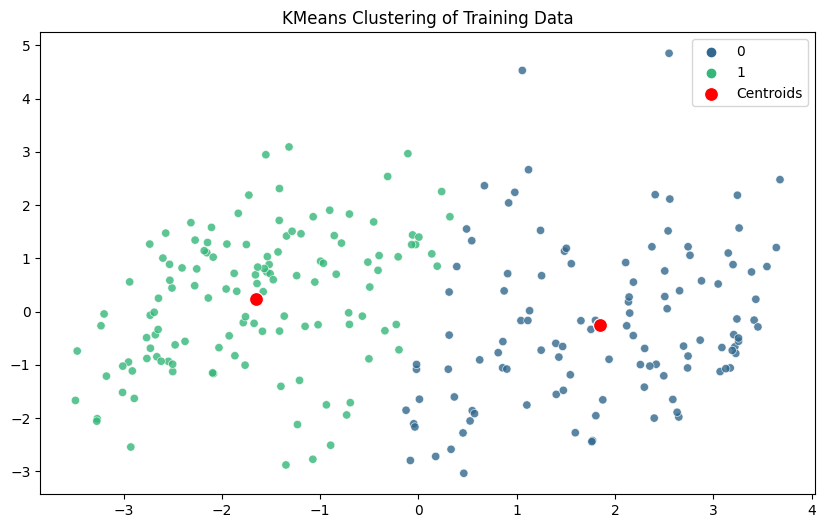

In [57]:
from scipy.stats import mode

# Reassign cluster labels based on majority voting
cluster_map = {}
for cluster_id in np.unique(train_clusters):
    # Find the most common true label in each cluster
    mask = train_clusters == cluster_id
    most_common_label = mode(y_train[mask], keepdims=True).mode[0]  # Ensure output is correctly accessed
    cluster_map[cluster_id] = most_common_label

# Map clusters to true labels
aligned_train_clusters = np.vectorize(cluster_map.get)(train_clusters)
accuracy = accuracy_score(y_train, aligned_train_clusters)
print("KMeans Cluster Accuracy(Training):", accuracy)


plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_train_pca[:,0], y=x_train_pca[:,1], hue=aligned_train_clusters, palette='viridis', alpha=0.8)
sns.scatterplot(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], color='red', s=100, label='Centroids')
plt.title('KMeans Clustering of Training Data')
plt.show()

# accuracy = accuracy_score(y_train, train_clusters)
# print("Accuracy of the Clustering-based Prediction Model:", accuracy)

KMeans Cluster Accuracy: 0.8688524590163934


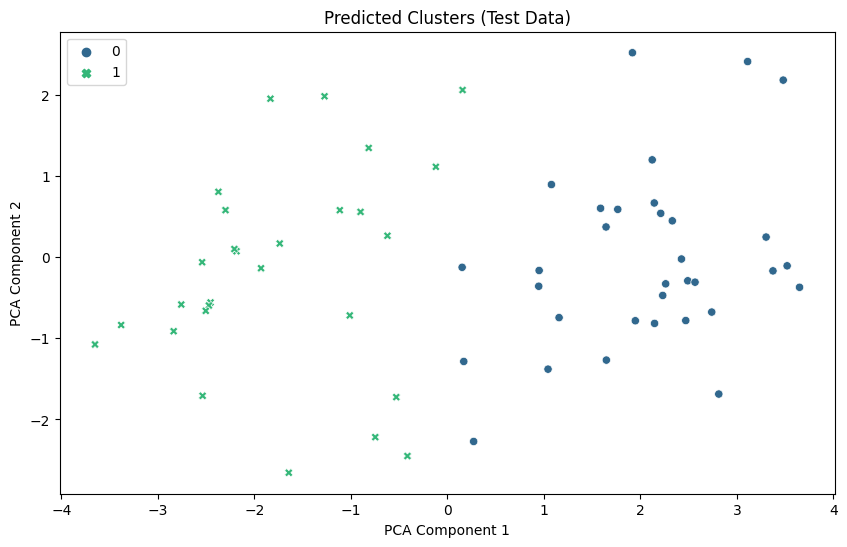

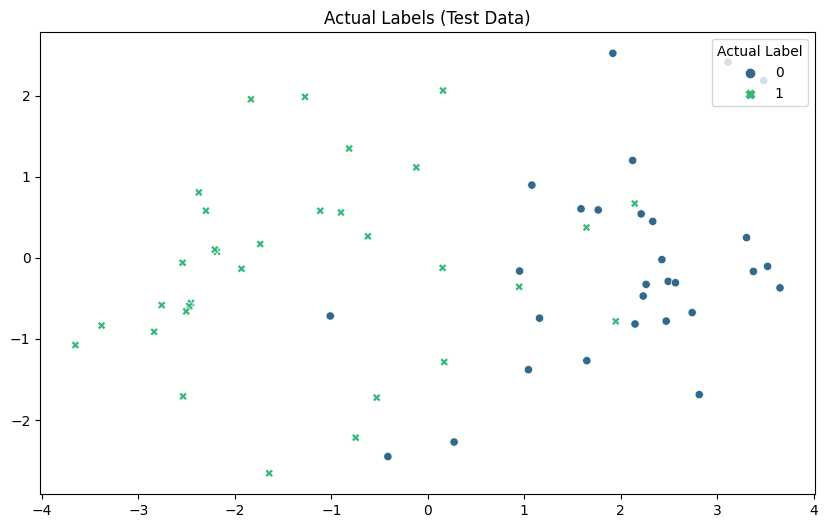

In [58]:
# Predict clusters for the test data
test_clusters = kmeans.predict(x_test_pca)

# Reassign cluster labels based on majority voting
cluster_map = {}
for cluster_id in np.unique(test_clusters):
    # Find the most common true label in each cluster
    mask = test_clusters == cluster_id
    most_common_label = mode(y_test[mask], keepdims=True).mode[0]  # Ensure output is correctly accessed
    cluster_map[cluster_id] = most_common_label

# Map clusters to true labels
aligned_test_clusters = np.vectorize(cluster_map.get)(test_clusters)
accuracy = accuracy_score(y_test, aligned_test_clusters)
print("KMeans Cluster Accuracy:", accuracy)

clustering_accuracy = []
clustering_accuracy.append(["KMeans", accuracy])

# Visualize the predicted clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_test_pca[:, 0], y=x_test_pca[:, 1], hue=aligned_test_clusters, style=aligned_test_clusters, palette='viridis', legend='brief')
plt.title('Predicted Clusters (Test Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_test_pca[:, 0], y=x_test_pca[:, 1], hue=y_test, style=y_test, palette='viridis', legend='brief')
plt.title('Actual Labels (Test Data)')
plt.legend(title='Actual Label', loc='upper right')
plt.show()

### 3.2.2 Agglomerative Clustering

Agglomerative Cluster Accuracy(Training): 0.8381742738589212


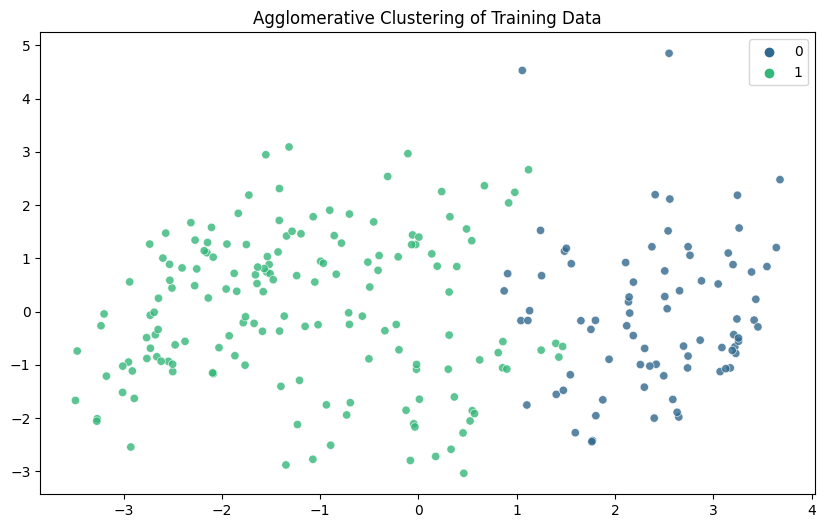

In [59]:
# Apply Agglomerative Clustering to the PCA-transformed data
agg = AgglomerativeClustering(n_clusters=2)
train_clusters = agg.fit_predict(x_train_pca)

# Reassign cluster labels based on majority voting
cluster_map = {}
for cluster_id in np.unique(train_clusters):
    # Find the most common true label in each cluster
    mask = train_clusters == cluster_id
    most_common_label = mode(y_train[mask], keepdims=True).mode[0]  # Ensure output is correctly accessed
    cluster_map[cluster_id] = most_common_label

# Map clusters to true labels
aligned_train_clusters = np.vectorize(cluster_map.get)(train_clusters)
accuracy = accuracy_score(y_train, aligned_train_clusters)
print("Agglomerative Cluster Accuracy(Training):", accuracy)


plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_train_pca[:,0], y=x_train_pca[:,1], hue=aligned_train_clusters, palette='viridis', alpha=0.8)
plt.title('Agglomerative Clustering of Training Data')
plt.show()


Agglomerative Cluster Accuracy: 0.8524590163934426


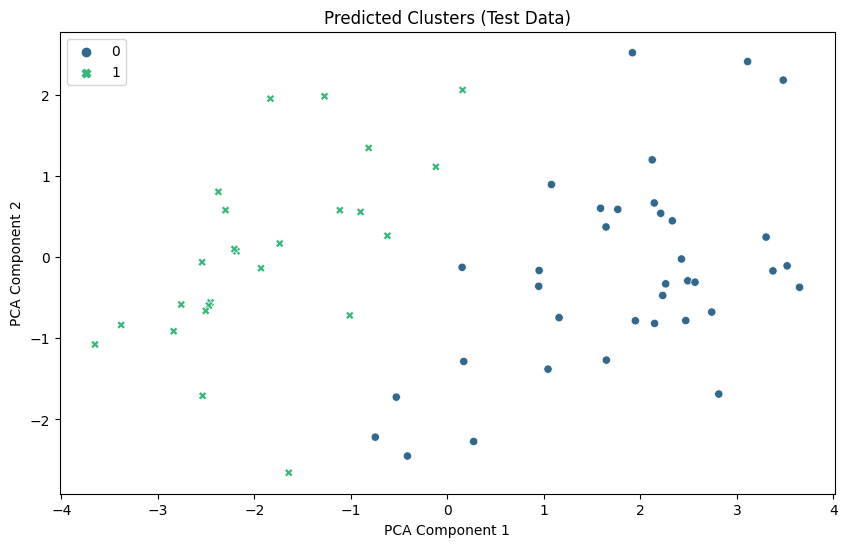

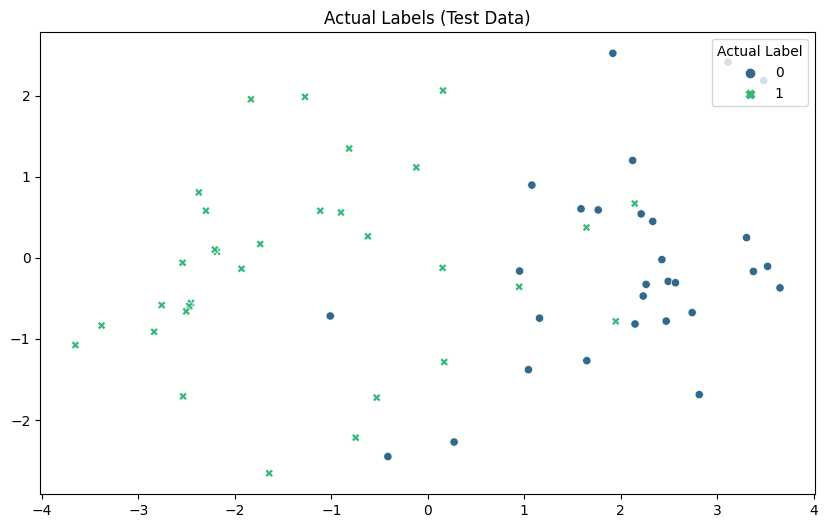

In [60]:
# Predict clusters for the test data
test_clusters = agg.fit_predict(x_test_pca)

# Reassign cluster labels based on majority voting
cluster_map = {}
for cluster_id in np.unique(test_clusters):
    # Find the most common true label in each cluster
    mask = test_clusters == cluster_id
    most_common_label = mode(y_test[mask], keepdims=True).mode[0]  # Ensure output is correctly accessed
    cluster_map[cluster_id] = most_common_label

# Map clusters to true labels
aligned_test_clusters = np.vectorize(cluster_map.get)(test_clusters)
accuracy = accuracy_score(y_test, aligned_test_clusters)
print("Agglomerative Cluster Accuracy:", accuracy)

clustering_accuracy.append(["AGGLO", accuracy])

# Visualize the predicted clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_test_pca[:, 0], y=x_test_pca[:, 1], hue=aligned_test_clusters, style=aligned_test_clusters, palette='viridis', legend='brief')
plt.title('Predicted Clusters (Test Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_test_pca[:, 0], y=x_test_pca[:, 1], hue=y_test, style=y_test, palette='viridis', legend='brief')
plt.title('Actual Labels (Test Data)')
plt.legend(title='Actual Label', loc='upper right')
plt.show()

### 3.2.3 DBSCAN clustering

DBSCAN Cluster Accuracy(Training): 0.8257261410788381


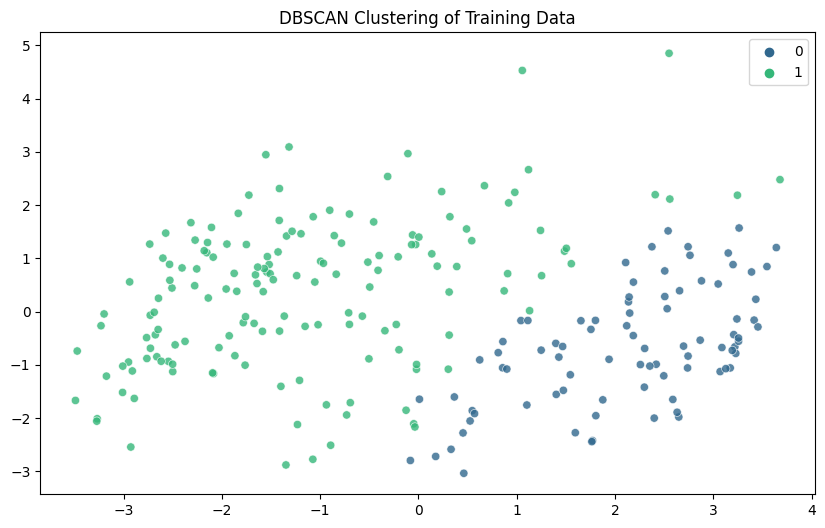

In [61]:
# Apply DBSCAN to the PCA-transformed data
dbscan = DBSCAN(eps=0.5, min_samples=5)
train_clusters = dbscan.fit_predict(x_train_pca)

# Reassign cluster labels based on majority voting
cluster_map = {}
for cluster_id in np.unique(train_clusters):
    # Find the most common true label in each cluster
    mask = train_clusters == cluster_id
    most_common_label = mode(y_train[mask], keepdims=True).mode[0]  # Ensure output is correctly accessed
    cluster_map[cluster_id] = most_common_label

# Map clusters to true labels
aligned_train_clusters = np.vectorize(cluster_map.get)(train_clusters)
accuracy = accuracy_score(y_train, aligned_train_clusters)
print("DBSCAN Cluster Accuracy(Training):", accuracy)


plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_train_pca[:,0], y=x_train_pca[:,1], hue=aligned_train_clusters, palette='viridis', alpha=0.8)
plt.title('DBSCAN Clustering of Training Data')
plt.show()


DBSCAN Cluster Accuracy: 0.6721311475409836


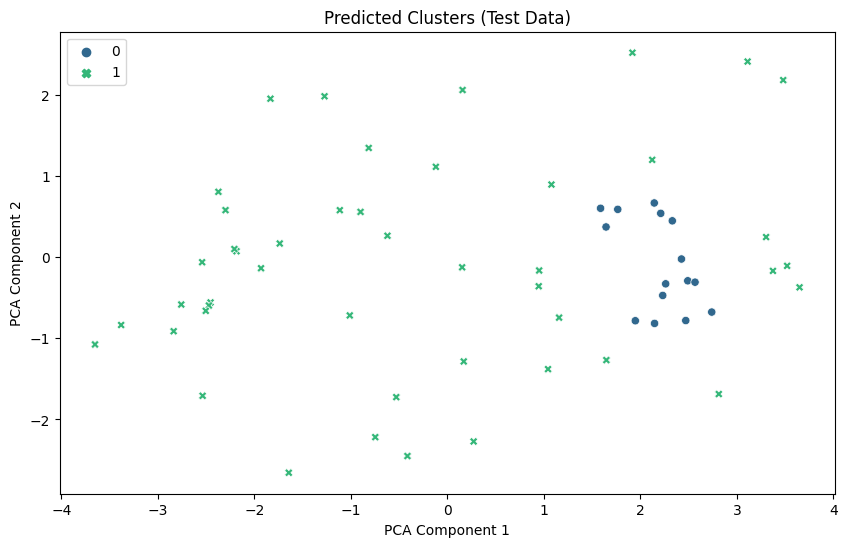

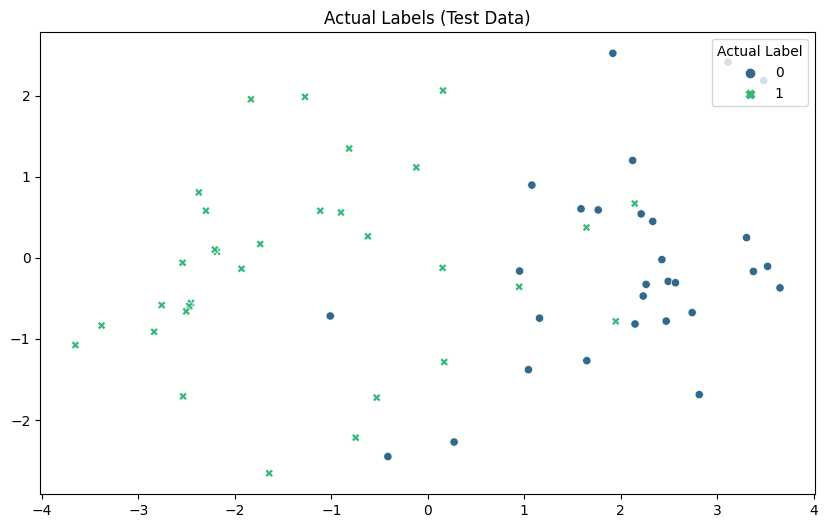

In [62]:
# Predict clusters for the test data
test_clusters = dbscan.fit_predict(x_test_pca)

# Reassign cluster labels based on majority voting
cluster_map = {}
for cluster_id in np.unique(test_clusters):
    # Find the most common true label in each cluster
    mask = test_clusters == cluster_id
    most_common_label = mode(y_test[mask], keepdims=True).mode[0]  # Ensure output is correctly accessed
    cluster_map[cluster_id] = most_common_label

# Map clusters to true labels
aligned_test_clusters = np.vectorize(cluster_map.get)(test_clusters)
accuracy = accuracy_score(y_test, aligned_test_clusters)
print("DBSCAN Cluster Accuracy:", accuracy)

clustering_accuracy.append(["DBSCAN", accuracy])

# Visualize the predicted clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_test_pca[:, 0], y=x_test_pca[:, 1], hue=aligned_test_clusters, style=aligned_test_clusters, palette='viridis', legend='brief')
plt.title('Predicted Clusters (Test Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_test_pca[:, 0], y=x_test_pca[:, 1], hue=y_test, style=y_test, palette='viridis', legend='brief')
plt.title('Actual Labels (Test Data)')
plt.legend(title='Actual Label', loc='upper right')
plt.show()

## 3.3 Modelling methods comparison

Accuracy of the Clustering-based Prediction Model:
KMeans: 0.8688524590163934
Agglomerative: 0.8524590163934426
DBSCAN: 0.6721311475409836


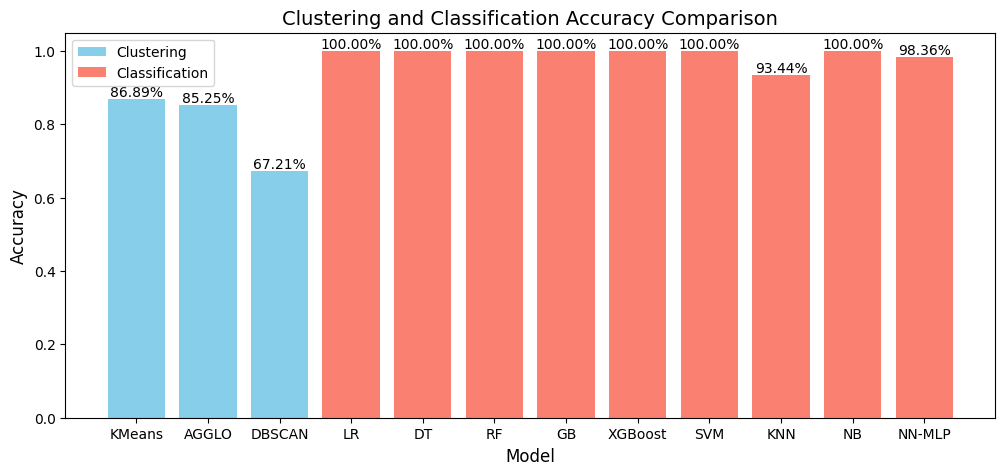

In [63]:
# display accuracy comparison of different clustering algorithms
print("Accuracy of the Clustering-based Prediction Model:")
print("KMeans:", 0.8688524590163934)
print("Agglomerative:", 0.8524590163934426)
print("DBSCAN:", 0.6721311475409836)

clustering_accuracy
classification_accuracy=[["LR", accuracy_score(y_test, predictedLR)], 
                         ["DT", accuracy_score(y_test, predictedDT)], 
                         ["RF", accuracy_score(y_test, predictedRF)], 
                         ["GB", accuracy_score(y_test, predictedGB)], 
                         ["XGBoost", accuracy_score(y_test, predictedXGB)], 
                         ["SVM", accuracy_score(y_test, predictedSVM)], 
                         ["KNN", accuracy_score(y_test, predictedKNN)], 
                         ["NB", accuracy_score(y_test, predictedNB)], 
                         ["NN-MLP", accuracy_score(y_test, predictedNN)]]

# draw histogram of clustering accuracy and classification accuracy with score printed
plt.figure(figsize=(12, 5))
plt.bar(*zip(*clustering_accuracy), color='skyblue', label='Clustering')
plt.bar(*zip(*classification_accuracy), color='salmon', label='Classification')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Clustering and Classification Accuracy Comparison', fontsize=14)
plt.legend()

# annotate the bar graph with percentages
for i, mean in enumerate(clustering_accuracy):
    plt.text(i, mean[1], f"{mean[1]*100:.2f}%", ha='center', va='bottom')
for i, mean in enumerate(classification_accuracy):
    plt.text(i+3, mean[1], f"{mean[1]*100:.2f}%", ha='center', va='bottom')

plt.show()



In [64]:
# compare k-fold cross-validation accuracy of different models
# cv_results.append({'Model': 'KMeans', 'CV Mean': 0.9304301075268817}, ignore_index=True)
modelnames.append('KMeans')
cv_mean.append(0.9304301075268817)

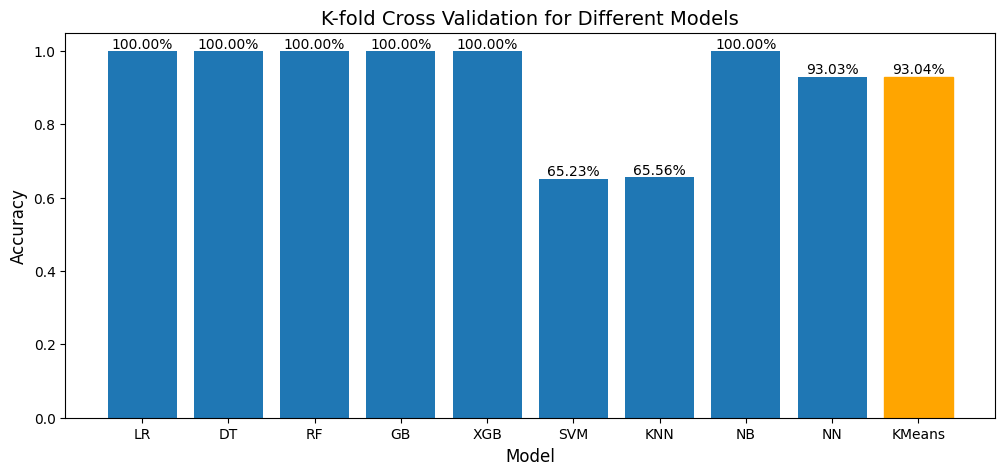

In [65]:
# draw the cross validation results,  bar colors  are different for each model
plt.figure(figsize=(12, 5))
bars = plt.bar(modelnames, cv_mean)
bars[-1].set_color('orange') # clustering - KMeans
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
# annotate the bar graph with percentages
for i, mean in enumerate(cv_mean):
    plt.text(i, mean, f"{mean*100:.2f}%", ha='center', va='bottom')

plt.title('K-fold Cross Validation for Different Models', fontsize=14)
plt.show()


# 4. ARM - Apriori Analysis
reference: 
- https://www.kaggle.com/code/mervetorkan/association-rules-with-python
- https://www.kaggle.com/code/licgsg/heart-attack-analysis-python

In [66]:
! pip install apyori

In [67]:
# Apriori Algorithm
from mlxtend.frequent_patterns import association_rules
from apyori import apriori
from mlxtend.preprocessing import TransactionEncoder

df = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
# df = pd.read_csv('./input/heart.csv')  

# binarized_df = pd.get_dummies(df.astype(str))

In [68]:
for i in ["age","trtbps","chol","thalachh","oldpeak"]:
    df[i] = pd.cut(df[i], 3)
    df[i] = i+df[i].astype(str)
for i in ['sex','exng','caa','cp','fbs','restecg','slp','thall','output']:
    df[i] = pd.cut(df[i], bins=[-1,0, 1, 2, 3, 4],
                     labels=[i+"-0", i+"-1", i+"-2", i+"-3", i+"-4"])

In [69]:
# create the tranactions list
transactions = []
for i in range(0, len(df)):
    transactions.append([str(df.values[i, j]) for j in range(0, 14)])
# transactions[:5]

In [70]:
rules = apriori(transactions,min_support=0.25,min_confidence = 0.7,min_length = 3)
results = list(rules)
results[:5]

[RelationRecord(items=frozenset({'chol(125.562, 272.0]'}), support=0.7326732673267327, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'chol(125.562, 272.0]'}), confidence=0.7326732673267327, lift=1.0)]),
 RelationRecord(items=frozenset({'fbs-0'}), support=0.8514851485148515, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'fbs-0'}), confidence=0.8514851485148515, lift=1.0)]),
 RelationRecord(items=frozenset({'oldpeak(-0.0062, 2.067]'}), support=0.834983498349835, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'oldpeak(-0.0062, 2.067]'}), confidence=0.834983498349835, lift=1.0)]),
 RelationRecord(items=frozenset({'chol(125.562, 272.0]', 'age(45.0, 61.0]'}), support=0.40264026402640263, ordered_statistics=[OrderedStatistic(items_base=frozenset({'age(45.0, 61.0]'}), items_add=frozenset({'chol(125.562, 272.0]'}), confidence=0.726190476190476, lift=0.991151866151866)]),
 RelationRecord(it

In [71]:
rules_data = []

# results = list(rules)

for rule in results:
    for ordered_statistic in rule.ordered_statistics:
        if 'output-1' in str(ordered_statistic.items_add):
            rules_data.append({
                'rule': str(ordered_statistic.items_base) + " -> " + str(ordered_statistic.items_add),
                'support': rule.support,
                'confidence': ordered_statistic.confidence
            })

rules_df = pd.DataFrame(rules_data)
rules_df.sort_values(by=['support'], ascending=False, inplace=True)

# Display the top 10 rules
pd.set_option('display.max_colwidth', None)
rules_df.head(10)

,rule,support,confidence
15,"frozenset({'exng-0', 'oldpeak(-0.0062, 2.067]'}) -> frozenset({'output-1'})",0.448845,0.743169
0,frozenset({'caa-0'}) -> frozenset({'output-1'}),0.429043,0.742857
3,frozenset({'thall-2'}) -> frozenset({'output-1'}),0.429043,0.783133
27,"frozenset({'thall-2'}) -> frozenset({'output-1', 'oldpeak(-0.0062, 2.067]'})",0.415842,0.759036
28,"frozenset({'thall-2', 'oldpeak(-0.0062, 2.067]'}) -> frozenset({'output-1'})",0.415842,0.823529
7,"frozenset({'caa-0'}) -> frozenset({'output-1', 'oldpeak(-0.0062, 2.067]'})",0.405941,0.702857
8,"frozenset({'caa-0', 'oldpeak(-0.0062, 2.067]'}) -> frozenset({'output-1'})",0.405941,0.788462
64,"frozenset({'exng-0', 'fbs-0', 'oldpeak(-0.0062, 2.067]'}) -> frozenset({'output-1'})",0.386139,0.740506
6,"frozenset({'caa-0', 'fbs-0'}) -> frozenset({'output-1'})",0.379538,0.741935
19,"frozenset({'exng-0', 'thall-2'}) -> frozenset({'output-1'})",0.376238,0.844444


# 5. Hyperparameter Tuning

## 5.1 KNN

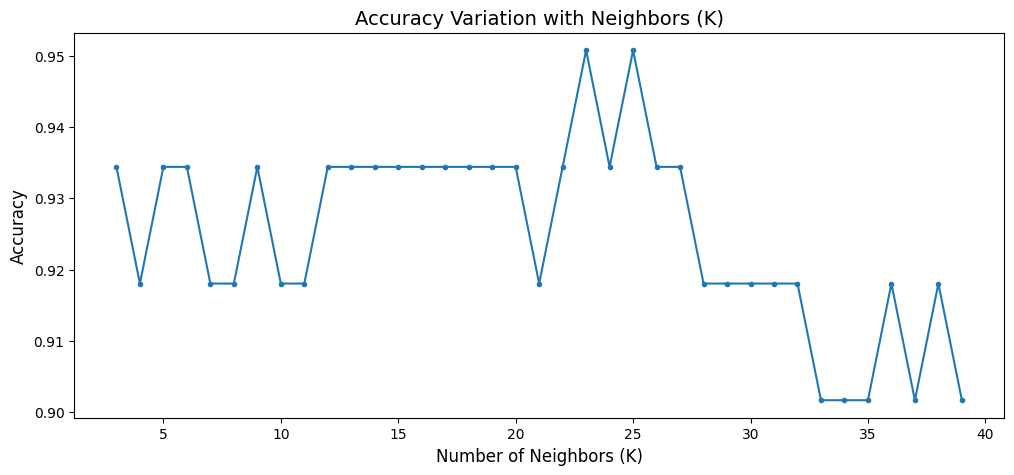

Best accuracy using KNN: 95.08% with K=23


In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Initialize required variables
accuracyList = []
maxAccuracy = 0
maxIndex = 0
bestPred = None
best_predict_model = None

# Iterate over different values of neighbors
for i in range(3, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predicted = knn.predict(x_test)
    current_accuracy = accuracy_score(y_test, predicted)
    accuracyList.append(current_accuracy)
    if maxAccuracy < current_accuracy:
        maxAccuracy = current_accuracy
        maxIndex = i
        bestPred = predicted
        best_predict_model = knn

# Plot accuracy variation with neighbors
plt.figure(figsize=(12, 5))
plt.plot(range(3, 40), accuracyList, marker='.')
plt.xlabel('Number of Neighbors (K)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy Variation with Neighbors (K)', fontsize=14)
plt.show()

# Print the best accuracy and corresponding K value
print(f"Best accuracy using KNN: {maxAccuracy*100:.2f}% with K={maxIndex}")

## 5.2 Random Forest

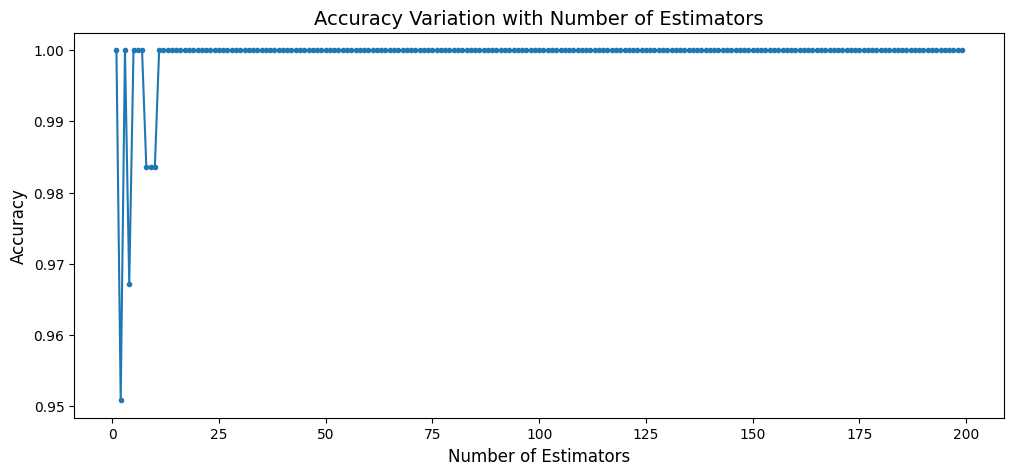

Best accuracy using Random Forest: 100.00% with 1 estimators


In [52]:
# Random Forest optimization
# Initialize required variables
accuracyList = []
maxAccuracy = 0
maxIndex = 0
bestPred = None
best_predict_model = None

for i in range(1, 200):
    rf = RandomForestClassifier(n_estimators=i, random_state=42)
    rf.fit(x_train, y_train)
    predictedRF = rf.predict(x_test)
    current_accuracy = accuracy_score(y_test, predictedRF)
    accuracyList.append(current_accuracy)
    if maxAccuracy < current_accuracy:
        maxAccuracy = current_accuracy
        maxIndex = i
        bestPred = predictedRF
        best_predict_model = rf

plt.figure(figsize=(12, 5))
plt.plot(range(1, 200), accuracyList, marker='.')
plt.xlabel('Number of Estimators', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy Variation with Number of Estimators', fontsize=14)
plt.show()
print(f"Best accuracy using Random Forest: {maxAccuracy*100:.2f}% with {maxIndex} estimators")
    
# print(f"Random Forest Accuracy with {i} estimators: ", accuracy_score(y_test, predictedRF)*100, "%")